In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Create a date range
date_rng = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')
# Create a sample time series data
data = pd.DataFrame(date_rng, columns=['date'])
data['value'] = np.random.randn(len(date_rng)) + np.linspace(0, 10, len(date_rng))
# Set the date column as the index
data.set_index('date', inplace=True)

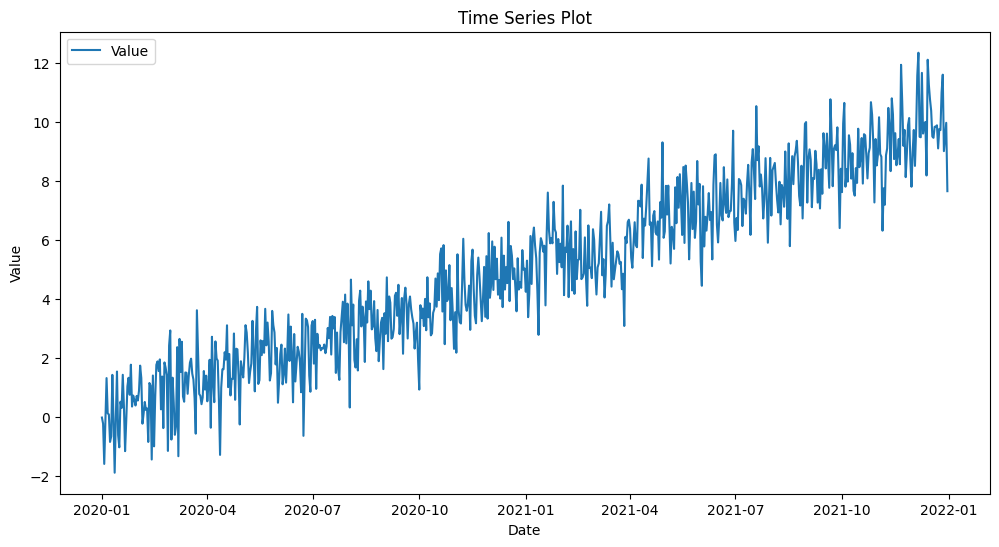

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], label='Value')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

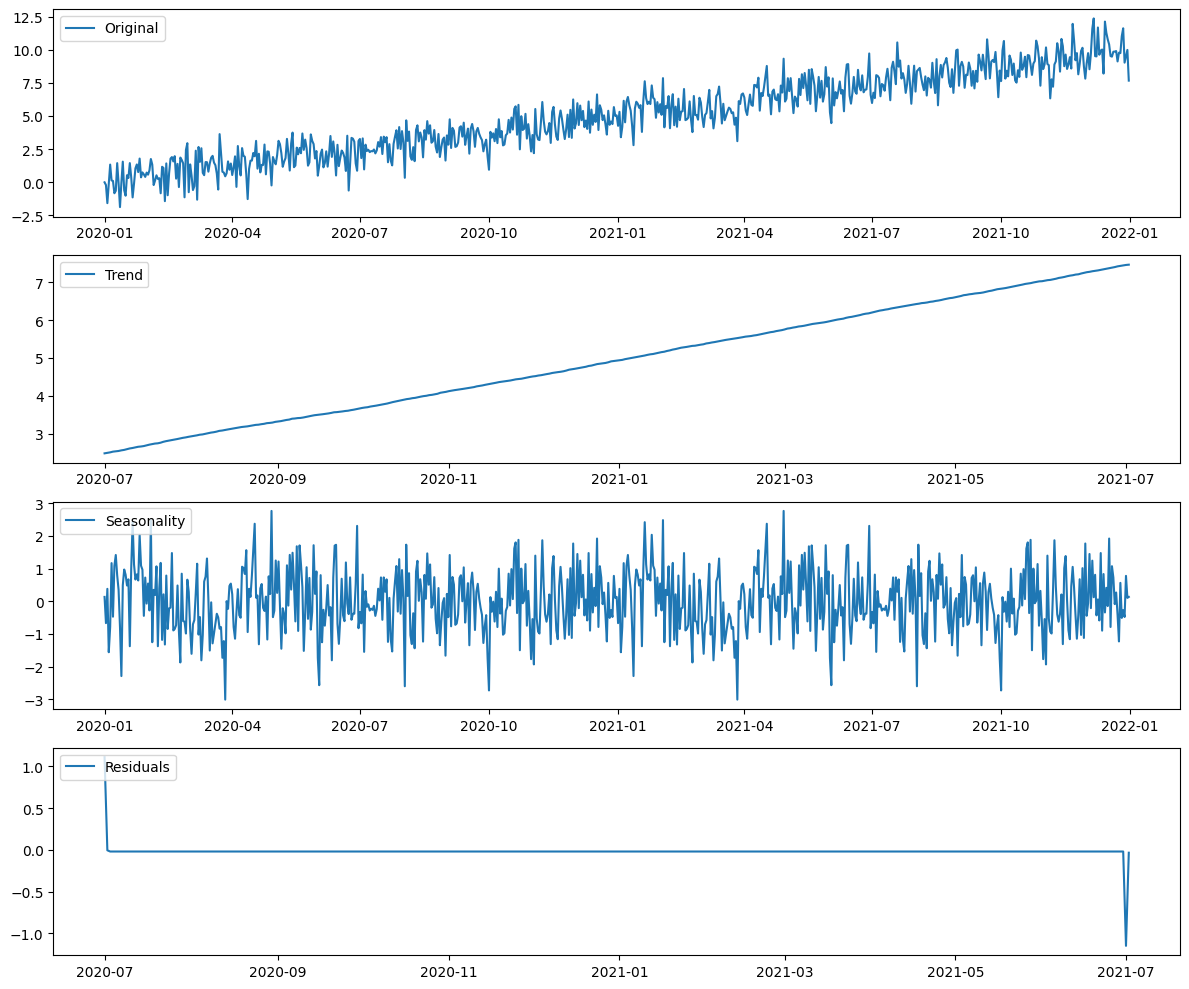

In [4]:
decomposition = seasonal_decompose(data['value'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(data['value'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

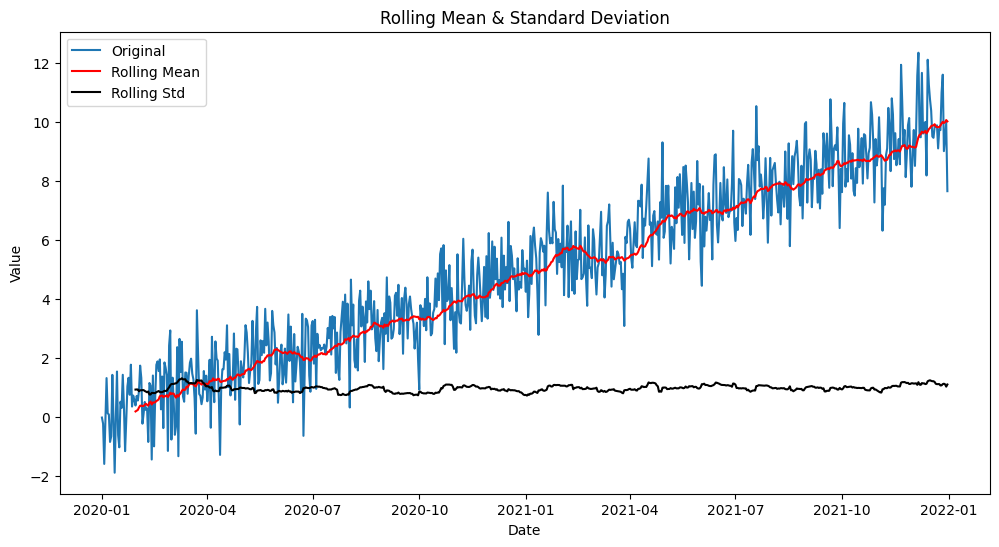

In [5]:
rolling_mean = data['value'].rolling(window=30).mean()
rolling_std = data['value'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

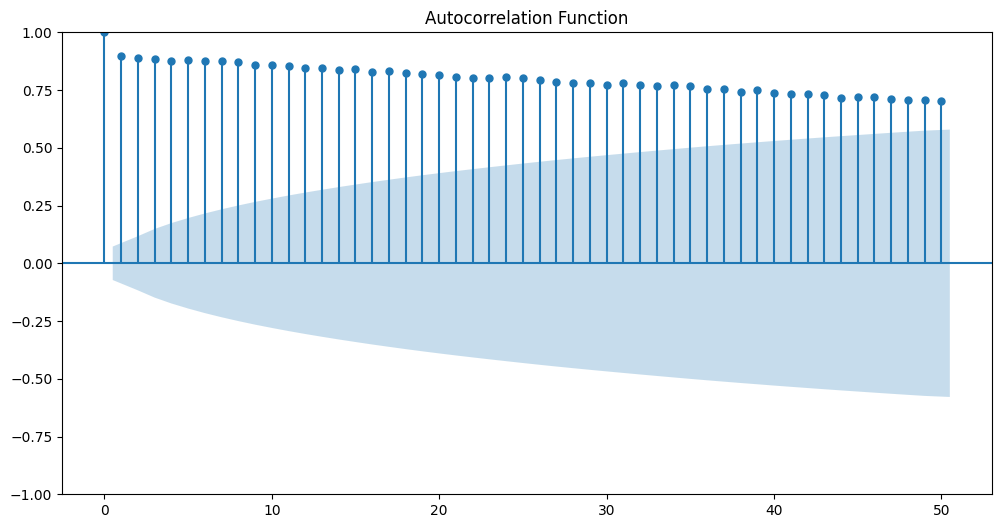

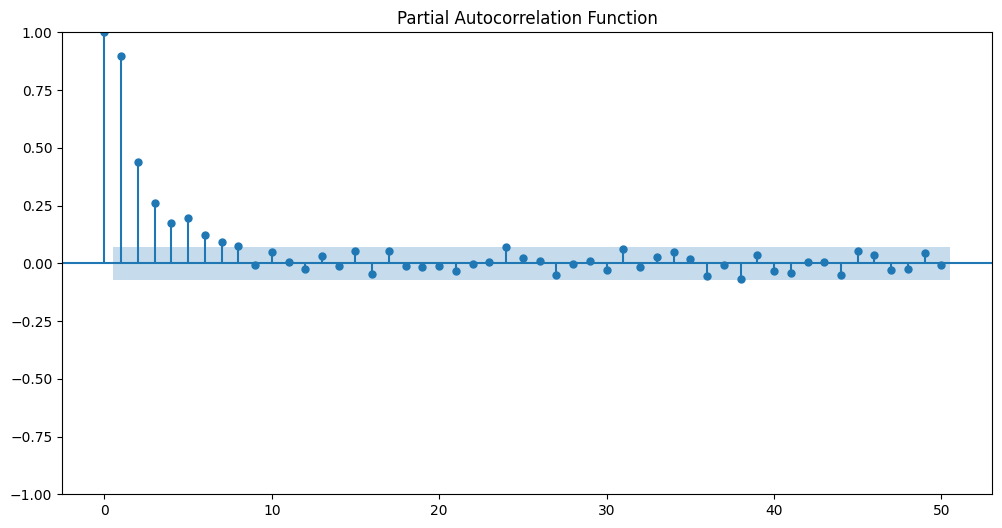

In [6]:
plt.figure(figsize=(12, 6))
plot_acf(data['value'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function')
plt.show()
plt.figure(figsize=(12, 6))
plot_pacf(data['value'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function')
plt.show()